# We Will Apply Dimensional Reduction and Clustering Concept Using IRIS Dataset

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import numpy as np
from scipy.spatial.distance import cdist
import pandas as pd

#  Description of the problem or question you are studying or trying to solve:
**Here we will show How Dimensional Reduction help us:**

- **1.visualization: to understand our data distribution by dealing with more than 2D..**
- **2.reduce noise: by remove less important feature.**
- **3.preserve useful info in low memory.**
- **4.less time complexity .**
- **5.less space complexit**

# Short description of the dataset you have selected.

**IRIS Dataset:**

The Iris flower data set is a multivariate data set introduced by the British statistician and biologist Ronald Fisher in his 1936 paper The use of multiple measurements in taxonomic problems. It is sometimes called Anderson's Iris data set because Edgar Anderson collected the data to quantify the morphologic variation of Iris flowers of three related species. The data set consists of 50 samples from each of three species of Iris (Iris Setosa, Iris virginica, and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals, in centimeters.

This dataset became a typical test case for many statistical classification techniques in machine learning such as support vector machines

**Content**
- The dataset contains a set of 150 records under 5 attributes - Petal Length, Petal Width, Sepal Length, Sepal width and Class(Species).

In [2]:
# import isis dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# State the methods you are using for dimensional reduction and clustering:

- Principle Component Analysis (PCA) and K-means

Text(0,0.5,'Petal Width')

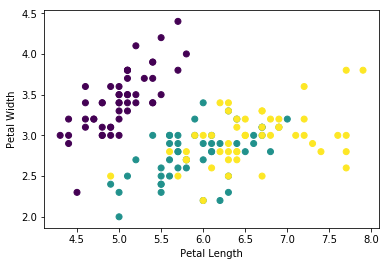

In [3]:
# Plot the data according to⁯  it's label
plt.scatter(X[:, 0], X[:, 1],c=y)

plt.xlabel(' Petal Length ')
plt.ylabel('Petal Width')

In [4]:
#Plot the data according to⁯  it's label
# plt.scatter(X[:, 2], X[:, 3], c=y)
# plt.xlabel('Sepal length')
# plt.ylabel('Sepal width')

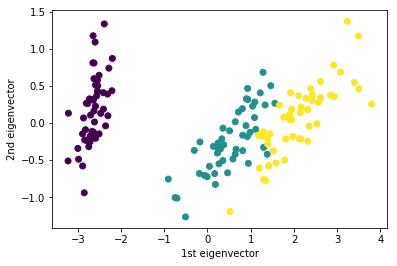

In [5]:
# plot the first two PCA dimensions
X_reduced = PCA(n_components=2)
X_reduced=X_reduced.fit_transform(X)
plt.scatter(X_reduced[:, 0] ,X_reduced[:, 1],c=y)
plt.xlabel("1st eigenvector")
plt.ylabel("2nd eigenvector")

plt.show()

#  Evaluate estimated principal components:
- Reconstruction error is one way to measure performance.Use PCA to project the points into the low dimensional space. Then, reconstruct the original points by projecting the low dimensional representations back into the original, high dimensional space. The distance between the original points and their reconstructions is inversely related to how well the model captures the structure of the data.

In [6]:
X[0]  #original Data

array([5.1, 3.5, 1.4, 0.2])

In [7]:
mu = np.mean(X, axis=0)

pca = PCA(n_components=2)
pca.fit(X)

nComp = 2
Xhat = np.dot(pca.transform(X)[:,:nComp], pca.components_[:nComp,:])
Xhat += mu

print(Xhat[0,])

[5.08303897 3.51741393 1.40321372 0.21353169]


# Perform Clustering using appropriate methods 
- a.	Kmeans 
- b.	Hierarchical Clustering
- c.	Gaussian Mixture Models/Expectation Maximization
- d.	DBSCAN 


# Kmeans

In [8]:
from sklearn.preprocessing import MinMaxScaler  #MinMaxScaler (gives the best accuracy)¶
X_s = MinMaxScaler()
data = X_s.fit_transform(X)

In [9]:
from sklearn import cluster
km = cluster.KMeans(n_clusters=3)
y_cluster_kmeans = km.fit_predict(data)



# Evaluate K-means by different values for K

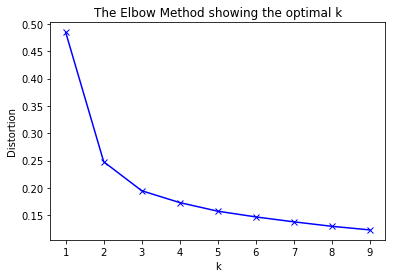

In [10]:
# k means determine k
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k).fit(data)
    kmeanModel.fit(data)
    distortions.append(sum(np.min(cdist(data, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

- note: here we will pick K value to be 3  

# Cluster Validation:
- we here have External indices data so we will use Adjusted Rand Score

In [11]:
from sklearn.metrics.cluster import adjusted_rand_score



In [12]:
adjusted_rand_score(y_cluster_kmeans, y)

0.7163421126838475

# Apply K-means on PCA Data points

In [13]:
X_sPCA = MinMaxScaler()
data_PCA = X_sPCA.fit_transform(X_reduced)

In [14]:
km_PCA = cluster.KMeans(n_clusters=3)
y_cluster_kmeans_PCA = km_PCA.fit_predict(data_PCA)

In [15]:
adjusted_rand_score(y_cluster_kmeans_PCA, y)

0.5828577799714192

# Hierarchical Clustering

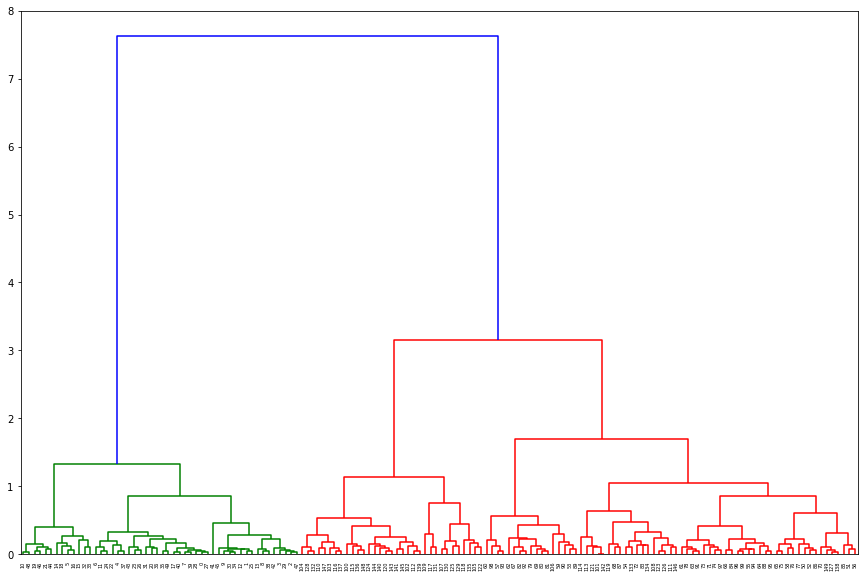

In [16]:
from scipy.cluster.hierarchy import dendrogram , ward,single
linkage = ward(data)
plt.figure(figsize=(15,10))
dendrogram(linkage)

plt.show()

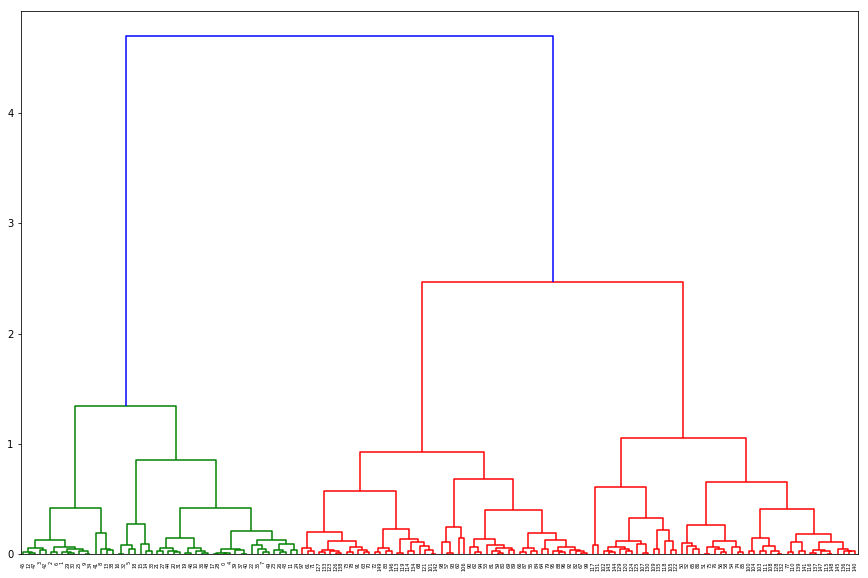

In [17]:
linkage_pca = ward(data_PCA)
plt.figure(figsize=(15,10))
dendrogram(linkage_pca)

plt.show()

# DBScan based Clustering


In [18]:
sp = cluster.SpectralClustering(n_clusters=3)
labelsDB = sp.fit_predict(data)

In [19]:
data=pd.DataFrame(data)

Text(0,0.5,'Sepal width')

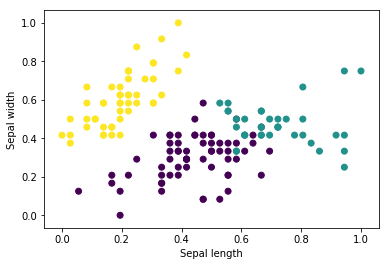

In [20]:
plt.scatter(data[0], data[1], c=labelsDB)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')

In [21]:
adjusted_rand_score(labelsDB, y)

0.6230625271215974

# Apply  DBScan on PCA Data points

In [22]:
sp_pca= cluster.SpectralClustering(n_clusters=3)
labelsDB_pca = sp_pca.fit_predict(data_PCA)

In [23]:
adjusted_rand_score(labelsDB_pca, y)

0.5321456497905563

# Gaussian Mixture Models/Expectation Maximization

In [24]:
from sklearn.mixture import GaussianMixture

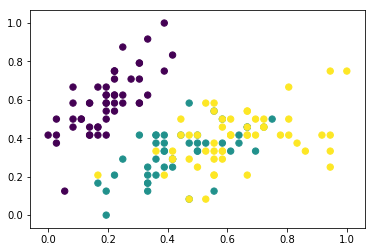

In [25]:
gmm = GaussianMixture(n_components=3).fit(data)
labels_gmm = gmm.predict(data)
plt.scatter(data[0], data[1], c=labels_gmm, s=40, cmap='viridis');

In [26]:
adjusted_rand_score(labels_gmm, y)

0.9038742317748124

# Apply GMM on PCA data points

In [27]:
gmm_pca = GaussianMixture(n_components=3).fit(data_PCA)
labels_gmm_pca = gmm_pca.predict(data_PCA)
adjusted_rand_score(labels_gmm_pca, y)

0.5828577799714192